In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.shape

(7043, 21)

In [7]:
columns=df.columns
for i in columns:
  print(i,len(df[i].unique()))

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
# from the above data we can remove the  customer id

In [10]:
df=df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
df.drop(df[df['tenure']==0].index,inplace=True)

In [17]:
df[df['tenure']==0]#checking

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
a=list(df['TotalCharges'].unique())
a.sort()
print(a)

[18.8, 18.85, 18.9, 19.0, 19.05, 19.1, 19.15, 19.2, 19.25, 19.3, 19.4, 19.45, 19.5, 19.55, 19.6, 19.65, 19.7, 19.75, 19.8, 19.85, 19.9, 19.95, 20.0, 20.05, 20.1, 20.15, 20.2, 20.25, 20.3, 20.35, 20.4, 20.45, 20.5, 20.55, 20.6, 20.65, 20.7, 20.75, 20.8, 20.85, 20.9, 20.95, 21.0, 21.05, 21.1, 23.45, 24.0, 24.05, 24.2, 24.25, 24.4, 24.45, 24.6, 24.7, 24.75, 24.8, 24.9, 25.0, 25.05, 25.1, 25.15, 25.2, 25.25, 25.3, 25.35, 25.4, 25.7, 25.75, 25.8, 25.85, 27.55, 28.3, 29.15, 29.7, 29.85, 29.9, 29.95, 30.2, 30.5, 30.55, 31.2, 31.35, 31.55, 31.9, 32.7, 33.2, 33.6, 33.7, 34.7, 34.75, 34.8, 35.0, 35.05, 35.1, 35.25, 35.45, 35.55, 35.75, 35.85, 35.9, 36.45, 36.55, 36.8, 37.2, 38.0, 38.15, 38.25, 38.45, 38.7, 38.8, 39.25, 39.3, 39.65, 39.8, 39.85, 40.1, 40.2, 40.25, 40.9, 41.2, 41.85, 42.45, 42.7, 42.9, 43.15, 43.3, 43.8, 43.85, 43.95, 44.0, 44.05, 44.1, 44.15, 44.2, 44.3, 44.35, 44.4, 44.45, 44.55, 44.6, 44.65, 44.7, 44.75, 44.8, 44.9, 44.95, 45.0, 45.05, 45.1, 45.15, 45.2, 45.25, 45.3, 45.35, 45.

In [19]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [20]:
#here all the most  data in categorical values except senor citizen

In [21]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df['InternetService'].describe()

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [23]:
df['tenure'].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [24]:
df['MonthlyCharges'].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


In [25]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


CHURN RATE

In [26]:

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%)")
print(churn_rate)




Churn Rate (%)
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


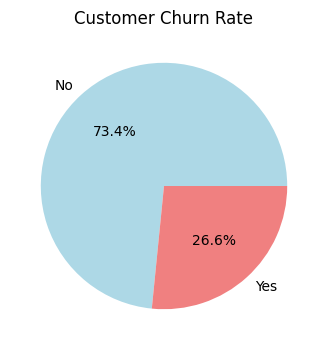

In [27]:
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Customer Churn Rate')
plt.ylabel('')
plt.show()

In [28]:
#product Recommendation

In [29]:
print(df.dtypes)


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')


In [31]:
grouped = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print(grouped)


          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.650010       61.307408   2555.344141
Yes    17.979133       74.441332   1531.796094


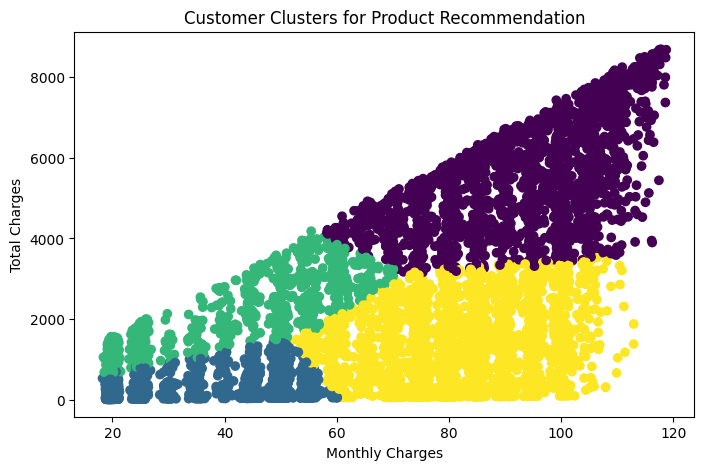

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters for Product Recommendation')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


Cluster Sizes:
Cluster
3    2269
0    1915
1    1695
2    1153
Name: count, dtype: int64


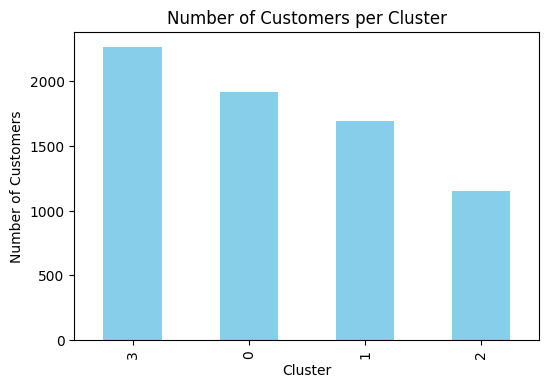

In [33]:
#analysing the cluster
# Counting customers in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)

# Visualizing cluster sizes
plt.figure(figsize=(6, 4))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


 cluster characteristics Only Numeric Columns

Cluster Profiles:
            tenure  MonthlyCharges  TotalCharges  Cluster
Cluster                                                  
0        59.463185       93.206110   5536.823916      0.0
1        10.263127       31.784336    303.578466      1.0
2        53.564614       34.719341   1825.258153      2.0
3        15.408550       80.769260   1249.036029      3.0


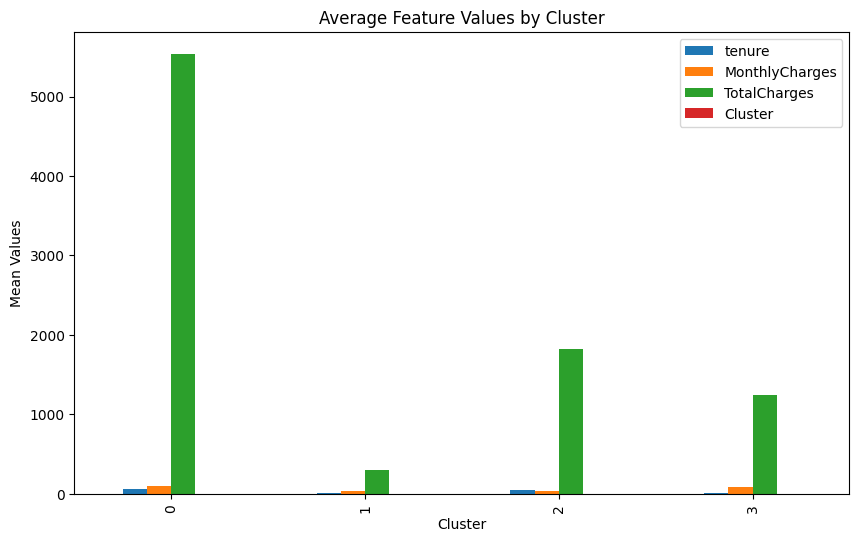

In [34]:

numeric_cols = df.select_dtypes(include=['number']).columns

# Group by cluster and calculate the mean
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Profiles:")
print(cluster_profile)

# Visualizing cluster profiles
cluster_profile.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.show()


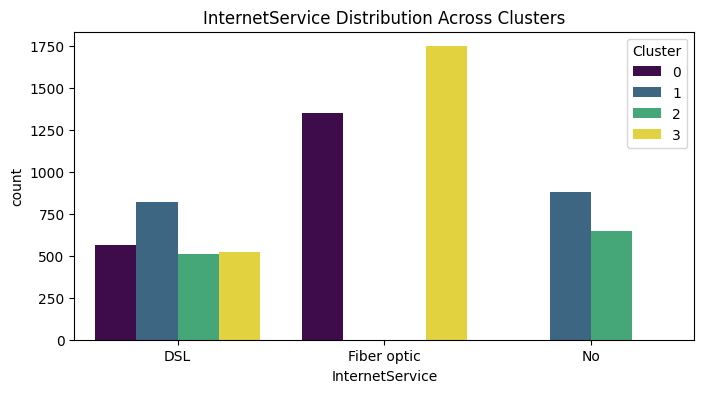

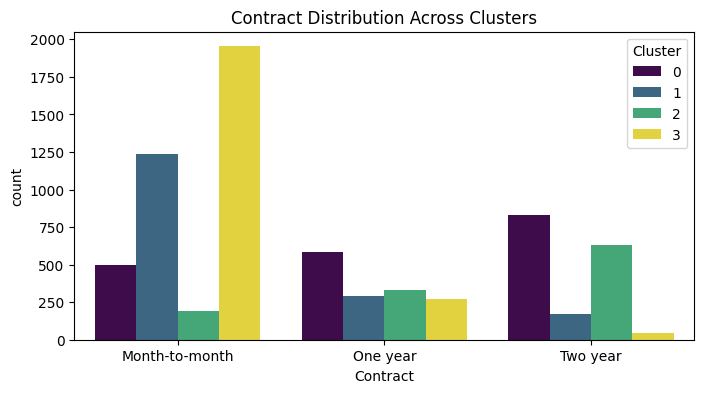

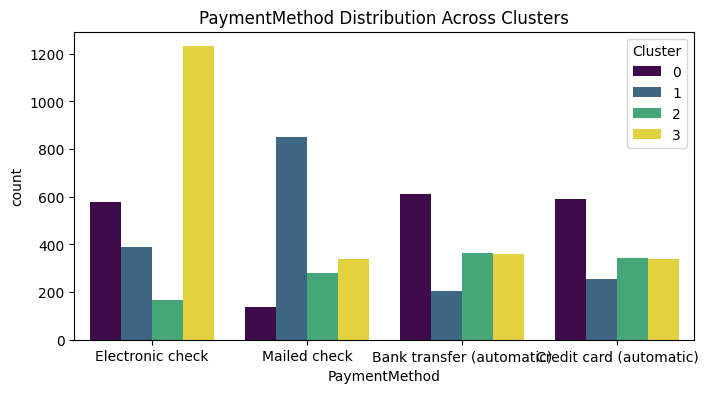

In [35]:
import seaborn as sns

# Analyzing categorical features within clusters
for col in ['InternetService', 'Contract', 'PaymentMethod']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Cluster', palette='viridis')
    plt.title(f'{col} Distribution Across Clusters')
    plt.show()


In [36]:
from sklearn.metrics import silhouette_score

# Calculating silhouette score
score = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.47


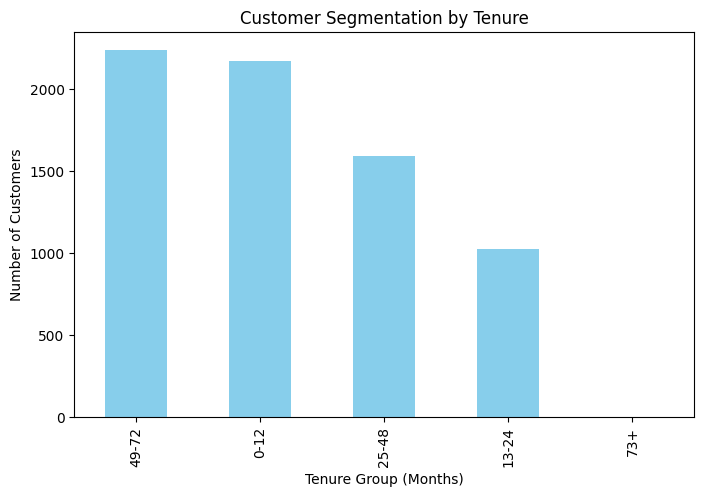

In [37]:
#  for tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72, 100], labels=['0-12', '13-24', '25-48', '49-72', '73+'])

#
plt.figure(figsize=(8, 5))
df['TenureGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by Tenure')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Number of Customers')
plt.show()


In [38]:
#sales Forecasting

In [39]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

print("Encoded DataFrame Shape:", df_encoded.shape)
df_encoded.head()


Encoded DataFrame Shape: (7032, 36)


,tenure,MonthlyCharges,TotalCharges,Cluster,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TenureGroup_13-24,TenureGroup_25-48,TenureGroup_49-72,TenureGroup_73+
0,1,29.85,29.85,1,False,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False
1,34,56.95,1889.50,2,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,True,False,False,True,True,False,False,False,False
3,45,42.30,1840.75,2,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,2,70.70,151.65,3,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False


Preprocessing

In [40]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [41]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster,TenureGroup
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,1,0-12
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,2,25-48
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,1,0-12
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,2,25-48
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,3,0-12


In [42]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [46]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is 

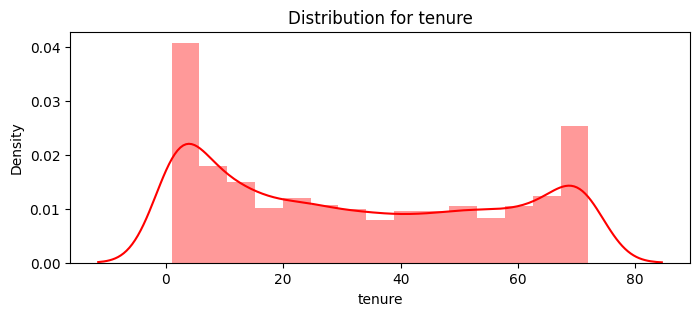

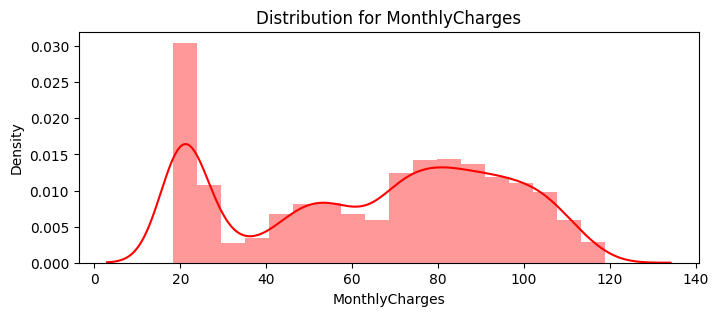

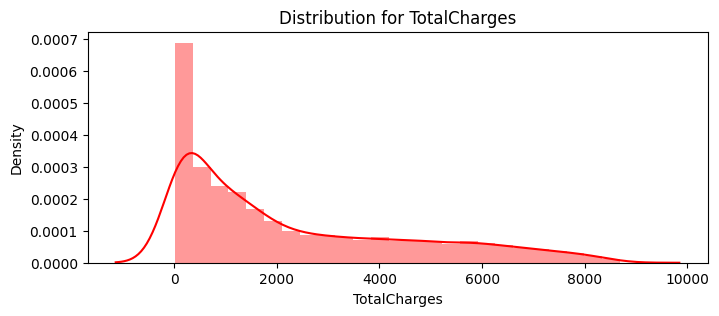

In [47]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df);

In [48]:
#standardizing numeric attributes

<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-46-8c8257b32bab>:4: UserWarning: 

`distplot` is 

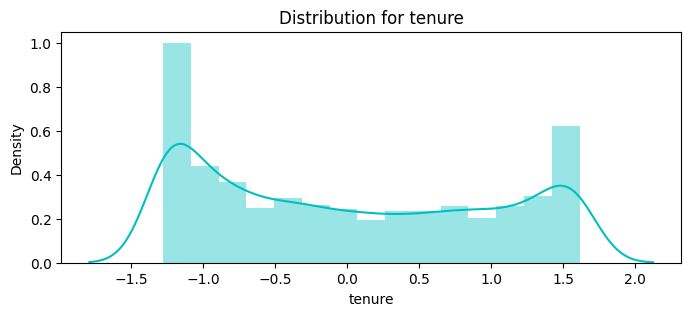

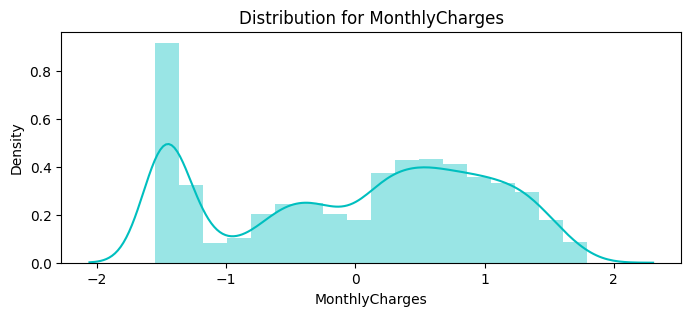

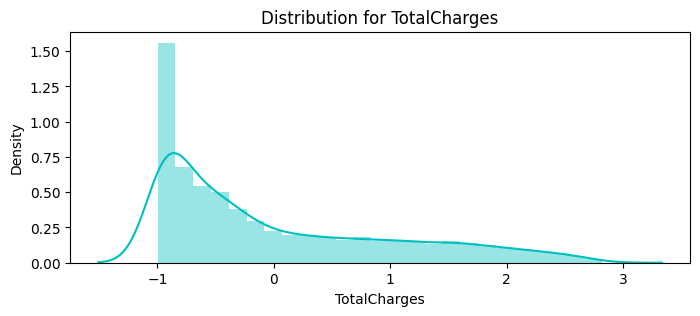

In [53]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')


In [54]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [55]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [56]:
#KNN

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Applying Label Encoding to all categorical columns
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.781042654028436


In [59]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.60      0.55      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



In [60]:
#random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Corrected Random Forest model
model_rf = RandomForestClassifier(n_estimators=100,
                                  random_state=50,
                                  max_features='sqrt',  # Changed from 'auto' to 'sqrt'
                                  max_leaf_nodes=30)

model_rf.fit(X_train, y_train)

# Make predictions
predictions = model_rf.predict(X_test)

# Evaluate the model
accuracy = model_rf.score(X_test, y_test)
print(f"Random Forest accuracy: {accuracy:.2f}")


Random Forest accuracy: 0.81



Sales Forecasting:
Estimated Total Monthly Revenue: $455661.00

Customer Clusters:
Cluster
2    3124
1    1704
3    1221
0     983
Name: count, dtype: int64


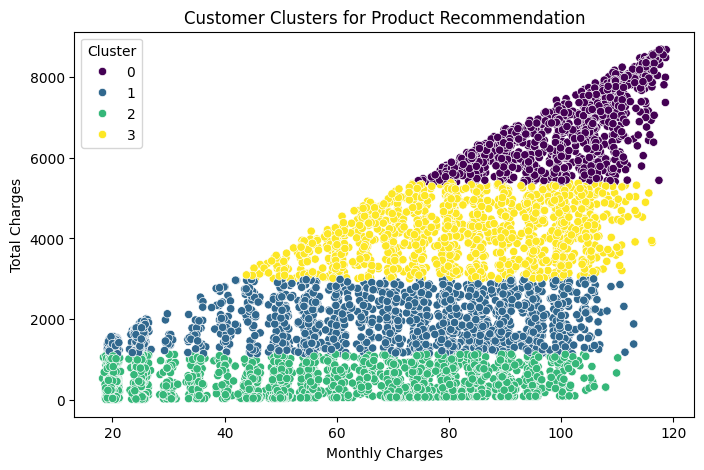


User Segmentation:
            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        66.261445      100.269634   6641.966582
1        37.015258       62.293809   1884.531103
2        11.732074       48.160531    411.235659
3        51.703522       82.304505   4120.535913


In [63]:
# Sales Forecasting using Average Monthly Charges
print('\nSales Forecasting:')
sales_forecast = df['MonthlyCharges'].sum()
print(f'Estimated Total Monthly Revenue: ${sales_forecast:.2f}')

# Product Recommendation using Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X[num_cols])
print('\nCustomer Clusters:')
print(df['Cluster'].value_counts())

# Visualizing Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Cluster', palette='viridis')
plt.title('Customer Clusters for Product Recommendation')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# User Segmentation Analysis
print('\nUser Segmentation:')
grouped = df.groupby('Cluster')[num_cols].mean()
print(grouped)


ValueError: Input y contains NaN.